,Target,K,8_div_K,Average,Speedup (Plain)
0,softmax_auto,32,True,6.744000e-06,1.098013
1,softmax_avx,32,True,6.260000e-07,11.829073
2,softmax_plain,32,True,7.405000e-06,1.000000


,Target,K,8_div_K,Average,Speedup (Plain)
3,softmax_auto,1024,True,0.000011,1.871472
4,softmax_avx,1024,True,0.000004,5.212006
5,softmax_plain,1024,True,0.000020,1.000000


,Target,K,8_div_K,Average,Speedup (Plain)
6,softmax_auto,10204,False,0.000050,2.283928
7,softmax_avx,10204,False,0.000039,2.975298
8,softmax_plain,10204,False,0.000115,1.000000


,Target,K,8_div_K,Average,Speedup (Plain)
9,softmax_auto,102040,True,0.000437,2.573473
10,softmax_avx,102040,True,0.000332,3.387693
11,softmax_plain,102040,True,0.001126,1.000000


,Target,K,8_div_K,Average,Speedup (Plain)
12,softmax_auto,1048576,True,0.004459,2.527178
13,softmax_avx,1048576,True,0.003215,3.505189
14,softmax_plain,1048576,True,0.011268,1.000000


,Target,K,8_div_K,Average,Speedup (Plain)
15,softmax_auto,1048580,False,0.004509,2.519824
16,softmax_avx,1048580,False,0.003255,3.490630
17,softmax_plain,1048580,False,0.011362,1.000000


,Target,K,8_div_K,Average,Speedup (Plain)
18,softmax_auto,1048583,False,0.004478,2.543248
19,softmax_avx,1048583,False,0.003206,3.551996
20,softmax_plain,1048583,False,0.011388,1.000000


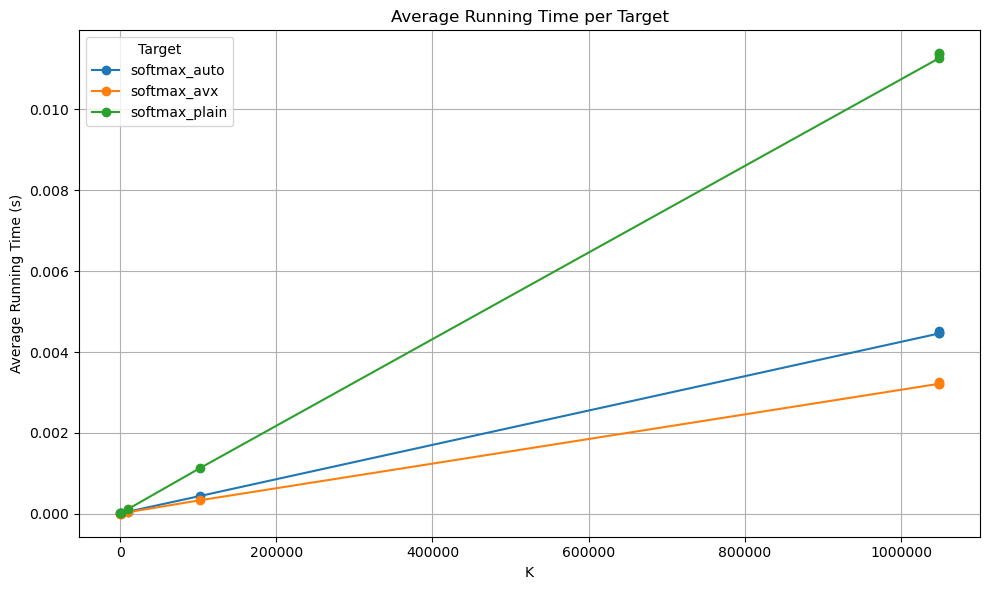

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

NUM_RUNS = 5
num_cols = 2 + NUM_RUNS
benchmark_file = "./out/benchmark_results.csv"

col_names = ['Target', 'K'] + [f'run_{i+1}' for i in range(NUM_RUNS)]

df = pd.read_csv(benchmark_file, header=None, names=col_names)

run_cols = [f'run_{i+1}' for i in range(NUM_RUNS)]
df[run_cols] = df[run_cols].apply(pd.to_numeric, errors='coerce')
df['K'] = pd.to_numeric(df['K'], errors='coerce')
df['Average'] = df[run_cols].mean(axis=1)
df['8_div_K'] = (df['K'] % 8) == 0
plt.figure(figsize=(10,6))
for K in df['K'].unique():
    plain_avg = df[(df['Target'] == 'softmax_plain') & (df['K'] == K)]['Average'].values[0]
    df.loc[df['K'] == K, 'Speedup (Plain)'] = plain_avg / df.loc[df['K'] == K, 'Average']

for K in df['K'].unique(): 
    display(df[df['K'] ==K ][['Target', 'K', '8_div_K', 'Average', 'Speedup (Plain)']])

# Per ciascun Target unico crea una linea diversa
for target in df['Target'].unique():
    sub_df = df[df['Target'] == target]
    plt.plot(sub_df['K'], sub_df['Average'], marker='o', label=target)

plt.title("Average Running Time per Target")
plt.xlabel("K")
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel("Average Running Time (s)")
plt.grid(True)
plt.legend(title="Target")
plt.tight_layout()
plt.savefig("./out/benchmark_target_avg.png")
plt.show()
